# Classification. Linear models and KNN

ПРОВЕРЯЮЩИМ! Я не делала 1 и 2 часть, сразу перешла к Титанику, так что тут можно не проверять. 

In [231]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Implementing Logistic Regression

In this task you need to implement Logistic Regression with l2 regularization using gradient descent algorithm.

Logistic Regression loss:
$$ L(w) = \dfrac{1}{N}\sum_{i=1}^N \log(1 + e^{-\langle w, x_i \rangle y_i}) + \frac{1}{2C} \lVert w \rVert^2  \to \min_w$$
$$\langle w, x_i \rangle = \sum_{j=1}^n w_{j}x_{ij} + w_{0},$$ $$ y_{i} \in \{-1, 1\}$$ where $n$ is the number of features and $N$ is the number of samples.

Gradient descent step:
$$w^{(t+1)} := w^{(t)} + \dfrac{\eta}{N}\sum_{i=1}^N y_ix_i \Big(1 - \dfrac{1}{1 + exp(-\langle w^{(t)}, x_i \rangle y_i)}\Big) - \eta \frac{1}{C} w,$$
where $\eta$ is the learning rate.

**(1.75 points)** Implement the algorithm and use it to classify the digits (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) into "even" and "odd" categories. "Even" and "Odd" classes  should correspond to {-1, 1} labels.

Stopping criteria: either the number of iterations exceeds *max_iter* or $||w^{(t+1)} - w^{(t)}||_2 < tol$.

In [ ]:
from sklearn.exceptions import NotFittedError

In [ ]:
class CustomLogisticRegression:
    _estimator_type = "classifier"
    
    def __init__(self, eta=0.001, max_iter=1000, C=1.0, tol=1e-5, random_state=42, zero_init=False):
        """Logistic Regression classifier.
        
        Args:
            eta: float, default=0.001
                Learning rate.
            max_iter: int, default=1000
                Maximum number of iterations taken for the solvers to converge.
            C: float, default=1.0
                Inverse of regularization strength; must be a positive float.
                Smaller values specify stronger regularization.
            tol: float, default=1e-5
                Tolerance for stopping criteria.
            random_state: int, default=42
                Random state.
            zero_init: bool, default=False
                Zero weight initialization.
        """
        self.eta = eta
        self.max_iter = max_iter
        self.C = C
        self.tol = tol
        self.random_state = np.random.RandomState(seed=random_state)
        self.zero_init = zero_init
         
    def get_sigmoid(self, X, weights):
        """Compute the sigmoid value."""
        # <your code>
        z=weights.T*X
        sigmoid = 1/(1+exp(-z))
        return sigmoid
    
    def get_loss(self, x, weights, y):
        """Calculate the loss."""
        # <your code>
        pass
     
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X]) # a constant feature is included to handle intercept
        num_features = X_ext.shape[1]
        if self.zero_init:
            self.weights_ = np.zeros(num_features) 
        else:
            weight_threshold = 1.0 / (2 * num_features)
            self.weights_ = self.random_state.uniform(low=-weight_threshold,
                                                      high=weight_threshold, size=num_features) # random weight initialization
        
        for i in range(self.max_iter):
            delta = "<your code>"
            self.weights_ -= self.eta * delta
            if "<your code>":
                break
     
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing positive class probabilities.
        """
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        if hasattr(self, 'weights_'):
            return self.get_sigmoid(X_ext, self.weights_)
        else: 
            raise NotFittedError("CustomLogisticRegression instance is not fitted yet")
    
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
from sklearn import datasets
from sklearn import metrics

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
#y_train = "<your code>"
#y_test = "<your code>"
y_train = (y_train % 2) * 2 - 1
y_test = (y_test % 2) * 2 - 1

In [ ]:
assert (np.unique(y_train) == [-1, 1]).all()
assert (np.unique(y_test) == [-1, 1]).all()

In [ ]:
def fit_evaluate(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test, normalize='true')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    return metrics.accuracy_score(y_pred=clf.predict(X_train), y_true=y_train), \
           metrics.accuracy_score(y_pred=clf.predict(X_test), y_true=y_test)

In [ ]:
lr_clf = CustomLogisticRegression(max_iter=1, zero_init=True)

In [ ]:
assert np.allclose(lr_clf.get_sigmoid(np.array([[0.5, 0, 1.0], [0.3, 1.3, 1.0]]), np.array([0.5, -0.5, 0.1])),
                   np.array([0.58662, 0.40131]))

In [ ]:
lr_clf.fit(X_train, y_train)

In [ ]:
assert np.allclose(lr_clf.weights_, np.array([ 3.1000e-06,  0.0000e+00,  4.1800e-05,  5.4770e-04,  2.2130e-04,
        4.8750e-04,  1.3577e-03,  5.9780e-04,  5.6400e-05, -7.0000e-07,
        1.6910e-04,  2.5190e-04, -4.3700e-04,  3.6190e-04,  1.0049e-03,
        4.2280e-04,  2.5700e-05,  3.0000e-07, -1.1500e-05, -7.2440e-04,
       -2.6200e-04,  8.7540e-04,  4.1540e-04, -8.4200e-05, -5.2000e-06,
        0.0000e+00, -2.2160e-04, -5.7130e-04,  9.8570e-04,  1.3507e-03,
        5.0210e-04, -1.7050e-04, -1.0000e-06,  0.0000e+00, -6.7810e-04,
       -1.0515e-03, -4.4500e-05,  3.7160e-04,  4.2100e-04, -8.1800e-05,
        0.0000e+00, -5.2000e-06, -5.3410e-04, -2.0393e-03, -8.4310e-04,
        1.0400e-04, -1.2390e-04, -1.7880e-04, -1.3200e-05, -4.5000e-06,
       -9.4300e-05, -1.1127e-03, -5.0900e-04, -2.1850e-04, -5.6050e-04,
       -3.9560e-04, -1.7700e-05, -3.0000e-07,  2.6800e-05,  6.3920e-04,
        1.8090e-04, -7.3660e-04, -5.3930e-04, -3.7060e-04, -2.8200e-05]), atol=1e-5)

In [ ]:
model = CustomLogisticRegression()

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
train_acc, test_acc

In [ ]:
assert min(train_acc, test_acc) > 0.9

**(0.5 points)** Visualize the loss history.

In [ ]:
## your code

**(0.5 points)** Try different learning rates and compare the results. How does the learning rate influence the convergence?

In [ ]:
## your code

< your thoughts >

**(0.5 points)** Try different regularization parameter values and compare the model quality.

In [ ]:
## your code

< your thoughts >

**(0.25 points)** Compare zero initialization and random initialization. 

In [ ]:
## your code

< your thoughts >

## Part 2: Implementing KNN Classifier

In this task you need to implement weighted K-Neighbors Classifier.

Recall that training a KNN classifier is simply memorizing a training sample. 

The process of applying a classifier for one object is to find the distances from it to all objects in the training data, then select the k nearest objects (neighbors) and return the most common class among these objects.

You can also give the nearest neighbors weights in accordance with the distance of the object to them. In the simplest case (as in your assignment), you can set the weights inversely proportional to that distance. 

$$w_{i} = \frac{1}{d_{i} + eps},$$

where $d_{i}$ is the distance between object and i-th nearest neighbor and $eps$ is the small value to prevent division by zero.

In case of 'uniform' weights, all k nearest neighbors are equivalent (have equal weight, for example $w_{i} = 1, \forall i \in(1,k)$).

To predict the probability of classes, it is necessary to normalize the weights of each class, dividing them by the sum:

$$p_{i} = \frac{w_{i}}{\sum_{j=1}^{c}w_{j}},$$

where $p_i$ is probability of i-th class and $c$ is the number of classes.

**(X points)** Implement the algorithm and use it to classify the digits. By implementing this algorithm, you will be able to classify numbers not only into "even" or "odd", but into their real representation.

In [ ]:
class CustomKNeighborsClassifier:
    _estimator_type = "classifier"
    
    def __init__(self, n_neighbors=5, weights='uniform', eps=1e-9):
        """K-Nearest Neighbors classifier.
        
        Args:
            n_neighbors: int, default=5
                Number of neighbors to use by default for :meth:`kneighbors` queries.
            weights : {'uniform', 'distance'} or callable, default='uniform'
                Weight function used in prediction.  Possible values:
                - 'uniform' : uniform weights.  All points in each neighborhood
                  are weighted equally.
                - 'distance' : weight points by the inverse of their distance.
                  in this case, closer neighbors of a query point will have a
                  greater influence than neighbors which are further away.
            eps : float, default=1e-5
                Epsilon to prevent division by 0 
        """
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.eps = eps
        
    
    def get_pairwise_distances(self, X, Y):
        """
        Returnes matrix of the pairwise distances between the rows from both X and Y.
        Args:
            X: numpy array of shape (n_samples, n_features)
            Y: numpy array of shape (k_samples, n_features)
        Returns:
            P: numpy array of shape (n_samples, k_samples)
                Matrix in which (i, j) value is the distance 
                between i'th row from the X and j'th row from the Y.
        """
        # <your code>
        pass
    
    
    def get_class_weights(self, y, weights):
        """
        Returns a vector with sum of weights for each class 
        Args:
            y: numpy array of shape (n_samles,)
            weights: numpy array of shape (n_samples,)
                The weights of the corresponding points of y.
        Returns:
            p: numpy array of shape (n_classes)
                Array where the value at the i-th position 
                corresponds to the weight of the i-th class.
        """
        # <your code>
        pass
            
        
    def fit(self, X, y):
        """Fit the model.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
            y: numpy array of shape (n_samples,)
                Target vector.        
        """
        self.points = X
        self.y = y
        self.classes_ = np.unique(y)
        
        
    def predict_proba(self, X):
        """Predict positive class probabilities.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples, n_classes)
                Vector containing positive class probabilities.
        """
        if hasattr(self, 'points'):
            P = self.get_pairwise_distances(X, self.points)
            
            weights_of_points = np.ones(P.shape)
            if self.weights == 'distance':
                weights_of_points = 'your code'
                
            # <your code>
            pass
        
        else: 
            raise NotFittedError("CustomKNeighborsClassifier instance is not fitted yet")
            
        
    def predict(self, X):
        """Predict classes.
        
        Args:
            X: numpy array of shape (n_samples, n_features)
        Returns:
            y: numpy array of shape (n_samples,)
                Vector containing predicted class labels.
        """
        # <your code>
        pass

In [ ]:
model = CustomKNeighborsClassifier(n_neighbors=5, weights='distance')
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [ ]:
assert np.allclose(model.get_pairwise_distances(np.array([[0  , 1]  , [1, 1]]), 
                                                np.array([[0.5, 0.5], [1, 0]])),
                   np.array([[0.70710678, 1.41421356],
                             [0.70710678, 1.        ]]))

In [ ]:
model.classes_ = ['one', 'two', 'three']
assert np.allclose(model.get_class_weights(np.array(['one', 'one', 'three', 'two']), np.array([1, 1, 0, 4])), 
                   np.array([2,4,0]))

In [ ]:
X, y = datasets.load_digits(n_class=10, return_X_y=True)

_, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
for ax, image, label in zip(axes.flatten(), X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r if label % 2 else plt.cm.afmhot_r)
    ax.set_title(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
model.fit(X_train, y_train)
knn.fit(X_train, list(map(str, y_train)));

In [ ]:
assert np.allclose(model.predict_proba(X_test), knn.predict_proba(X_test))

In [ ]:
train_acc, test_acc = fit_evaluate(model, X_train, y_train, X_test, y_test)

In [ ]:
assert train_acc == 1
assert test_acc > 0.98

**(X points)** Take a look at the confusion matrix and tell what numbers the model confuses and why this happens.

< your thoughts >

**(X points)** Try different n_neighbors parameters and compare the output probabilities of the model.

In [ ]:
## your code

< your thoughts >

**(X points)** Compare both 'uniform' and 'distance' weights and share your thoughts in what situations which parameter can be better.

In [ ]:
## your code

< your thoughts >

**(X points)** Suggest another distance measurement function that could improve the quality of the classification for this task. 

< your thoughts >

**(X points)** Suggest different task and distance function that you think would be suitable for it.

< your thoughts >

## Part 3: Synthetic Titanic Survival Prediction

### Dataset

Read the description here: https://www.kaggle.com/c/tabular-playground-series-apr-2021/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/tabular-playground-series-apr-2021/overview/evaluation.  


In [233]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
#PATH = "./data/"
PATH = "/content/drive/MyDrive/Datas/Titanic"

In [235]:
data = pd.read_csv(os.path.join(PATH, 'train.csv')).set_index('PassengerId')

In [236]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

In [237]:
data['Sex'].value_counts()

male      56114
female    43886
Name: Sex, dtype: int64

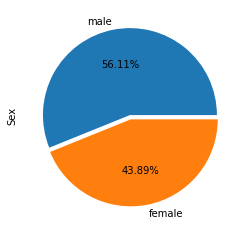

In [238]:
explode = [0, 0.05]
data['Sex'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

In [239]:
data['Survived'].value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

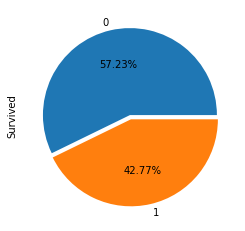

In [240]:
explode = [0, 0.05]
data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

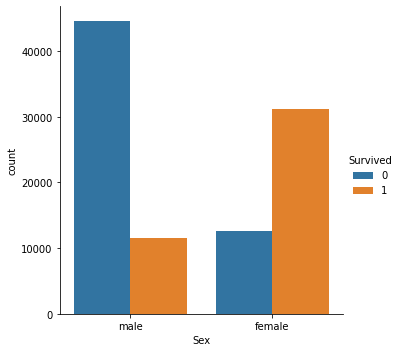

In [241]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data=data)

< your thoughts >
*Количество мужчин и женщин примерно одинаково, спасенных и погибших также. Однако спасшихся женщин больше, чем мужчин. *

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

In [242]:
data.Age.max()

87.0

In [243]:
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
data['age_group'] = pd.cut(data.Age, range(0, 91, 10), right=False, labels=age_labels)

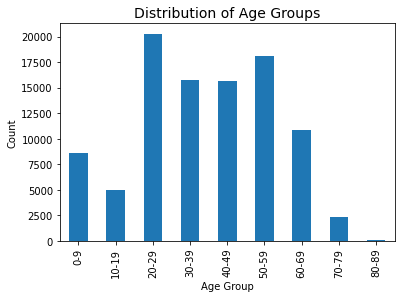

In [244]:
data.groupby(['age_group']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

In [245]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0-9
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,10-19
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,20-29


In [246]:
data.groupby(['Survived']).Age.median()

Survived
0    36.0
1    43.0
Name: Age, dtype: float64

In [247]:
data.groupby(['Survived']).Age.mean()

Survived
0    36.708695
1    40.553799
Name: Age, dtype: float64

< your thoughts >
Распределение возвраста для выживших и не выживших не отличаются, так как среднее и медианное значение почти совпадают для обоих случаев. 

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

In [248]:
data.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           17576
        0           12739
2       1           15057
        0           13622
3       0           30865
        1           10141
Name: Survived, dtype: int64

In [249]:
#относительное количество спасшихся в каждом классе
data.groupby('Pclass').Survived.mean()

Pclass
1    0.579779
2    0.525018
3    0.247305
Name: Survived, dtype: float64

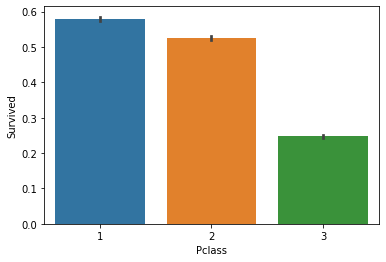

In [250]:
sns.barplot(x='Pclass', y='Survived', data=data)

Процент спасшихся в 1 и 2 классе значительно больше, чем в 3 классе. 

In [251]:
data.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1           16669
          0            5518
Q         1            3238
          0            2186
S         0           49394
          1           22745
Name: Survived, dtype: int64

In [252]:
data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.751296
1,Q,0.596976
2,S,0.315294


75% пассажиров, севших в порте С спаслись, что значительно больше, чем пассажиры из портов Q и S

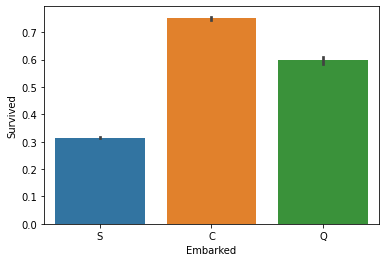

In [253]:
sns.barplot(x='Embarked', y='Survived', data=data)

Связано ли данное распределение с тем, что в порте С село большее количество пассажиров 1 и 2 класса и (или) женщин?

In [254]:
data.groupby(['Embarked', 'Pclass', 'Sex']).Survived.value_counts()

Embarked  Pclass  Sex     Survived
C         1       female  1            6903
                          0            1141
                  male    1            2263
                          0            1536
          2       female  1            4430
                          0             578
                  male    1             591
                          0             557
          3       female  1            2033
                          0             701
                  male    0            1005
                          1             449
Q         1       female  1            1946
                          0             894
                  male    0             504
                          1             407
          2       female  1             469
                          0             125
                  male    0             167
                          1              83
          3       female  1             274
                          0             1

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


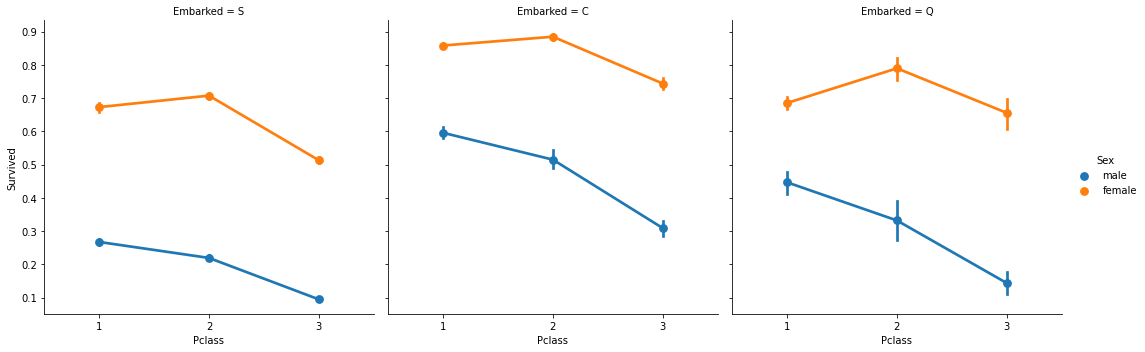

In [255]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data)

Из графиков видно, что доля спасишихся и мужчин, и женщин, севших в порте С выше, даже для 3 класса. Наименьшая доля спасшихся людей из порта S. 
Почти все женщины из 1 и 2 класса спаслись. Большие шансы выжить были у мужчин 1 и 2 класса, севших в порте С. Наименьшая у мужчин из порта S, независимо от класса.

In [256]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,NaN
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S,NaN
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0-9
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,10-19
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,20-29


### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [257]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 3.292%
SibSp - 0.0%
Parch - 0.0%
Ticket - 4.623%
Fare - 0.134%
Cabin - 67.866%
Embarked - 0.25%
age_group - 3.292%


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Признак кабины и билета скорее всего никак не удастся заполнить, т.к. в нем большой процент пропущенных значений. Можно попробовать извлечь информацию, какие записи были у схожих пассажиров: с таким же портом посадки и стоимостью билета. 
Пропущенный возраст можно заполнить средним значением и исходя из класса. 
Порт и стоимость билета можно попробовать заполнить самым часто встречаемым из-за того, что процент пропусков небольшой.

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

**Конвертируем категориальные признаки в числовые, попутно заполняя пропущенные значения**

In [258]:
data['Sex'] = data['Sex'].replace(['female','male'],[0,1])

In [259]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].replace(['S','C','Q'],[0,1,2])

In [260]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,27.14,C12239,0,NaN
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,13.35,NaN,0,NaN
2,0,3,"Owens, Kenneth",1,0.33,1,2,CA 457703,71.29,NaN,0,0-9
3,0,3,"Kramer, James",1,19.00,0,0,A. 10866,13.04,NaN,0,10-19
4,1,3,"Bond, Michael",1,25.00,0,0,427635,7.76,NaN,0,20-29


Пропущенные значения возраста дозаполним случайными значениями из диапазона  среднее минус-плюс стд. Разделим все возможные возраста на 5 групп.

In [261]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()
age_null_count = data['Age'].isnull().sum()
    
age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
data['Age'][np.isnan(data['Age'])] = age_null_random_list
data['Age'] = data['Age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [262]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,43,2,0,209245,27.14,C12239,0,NaN
1,0,3,"Bryan, Drew",1,39,0,0,27323,13.35,NaN,0,NaN
2,0,3,"Owens, Kenneth",1,0,1,2,CA 457703,71.29,NaN,0,0-9
3,0,3,"Kramer, James",1,19,0,0,A. 10866,13.04,NaN,0,10-19
4,1,3,"Bond, Michael",1,25,0,0,427635,7.76,NaN,0,20-29


In [263]:
data['age_group'] = data['age_group'].replace(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'],[0, 0, 1, 1, 2, 3, 3, 4, 4])

In [264]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,43,2,0,209245,27.14,C12239,0,NaN
1,0,3,"Bryan, Drew",1,39,0,0,27323,13.35,NaN,0,NaN
2,0,3,"Owens, Kenneth",1,0,1,2,CA 457703,71.29,NaN,0,0.0
3,0,3,"Kramer, James",1,19,0,0,A. 10866,13.04,NaN,0,0.0
4,1,3,"Bond, Michael",1,25,0,0,427635,7.76,NaN,0,1.0


In [265]:
data['Age']=data['age_group']
data.drop(['age_group'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,27.14,C12239,0
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,13.35,NaN,0
2,0,3,"Owens, Kenneth",1,0.0,1,2,CA 457703,71.29,NaN,0
3,0,3,"Kramer, James",1,0.0,0,0,A. 10866,13.04,NaN,0
4,1,3,"Bond, Michael",1,1.0,0,0,427635,7.76,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",0,3.0,0,0,PC 15008,14.86,D17243,1
99996,0,2,"Brown, Herman",1,3.0,0,0,13273,11.15,NaN,0
99997,0,3,"Childress, Charles",1,1.0,0,0,NaN,9.95,NaN,0


In [266]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [267]:
data['FareBand'] = pd.qcut(data['Fare'], 4)
print (data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

          FareBand  Survived
0   (0.679, 10.04]  0.246155
1   (10.04, 24.46]  0.374201
2   (24.46, 33.47]  0.510109
3  (33.47, 744.66]  0.581063


In [268]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,FareBand
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,27.14,C12239,0,NaN,"(24.46, 33.47]"
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,13.35,NaN,0,NaN,"(10.04, 24.46]"
2,0,3,"Owens, Kenneth",1,0.0,1,2,CA 457703,71.29,NaN,0,0.0,"(33.47, 744.66]"
3,0,3,"Kramer, James",1,0.0,0,0,A. 10866,13.04,NaN,0,0.0,"(10.04, 24.46]"
4,1,3,"Bond, Michael",1,1.0,0,0,427635,7.76,NaN,0,1.0,"(0.679, 10.04]"


In [269]:
data['FareBand'] = data['FareBand'].astype(str)
data['FareBand'] = data['FareBand'].replace(['(0.679, 10.04]','(10.04, 24.46]','(24.46, 33.47]','(33.47, 744.66]'],[0, 1, 2, 3])

In [270]:
data['Fare']=data['FareBand']
data.drop(['FareBand'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,2,C12239,0,NaN
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,1,NaN,0,NaN
2,0,3,"Owens, Kenneth",1,0.0,1,2,CA 457703,3,NaN,0,0.0
3,0,3,"Kramer, James",1,0.0,0,0,A. 10866,1,NaN,0,0.0
4,1,3,"Bond, Michael",1,1.0,0,0,427635,0,NaN,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",0,3.0,0,0,PC 15008,1,D17243,1,3.0
99996,0,2,"Brown, Herman",1,3.0,0,0,13273,1,NaN,0,3.0
99997,0,3,"Childress, Charles",1,1.0,0,0,NaN,0,NaN,0,1.0


In [271]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,FareBand
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,2,C12239,0,NaN,2
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,1,NaN,0,NaN,1
2,0,3,"Owens, Kenneth",1,0.0,1,2,CA 457703,3,NaN,0,0.0,3
3,0,3,"Kramer, James",1,0.0,0,0,A. 10866,1,NaN,0,0.0,1
4,1,3,"Bond, Michael",1,1.0,0,0,427635,0,NaN,0,1.0,0


**Cabin и Ticket не знаю, что делать. **

**Классификация**

In [272]:
test = pd.read_csv(os.path.join(PATH, 'test.csv'))

In [273]:
y_train = data['Survived']
X_train = data.drop('Survived', axis=1)

X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((100000, 12), (100000,), (100000, 10))

In [274]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,FareBand
PassengerId,,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",1,NaN,2,0,209245,2,C12239,0,NaN,2
1,0,3,"Bryan, Drew",1,NaN,0,0,27323,1,NaN,0,NaN,1
2,0,3,"Owens, Kenneth",1,0.0,1,2,CA 457703,3,NaN,0,0.0,3
3,0,3,"Kramer, James",1,0.0,0,0,A. 10866,1,NaN,0,0.0,1
4,1,3,"Bond, Michael",1,1.0,0,0,427635,0,NaN,0,1.0,0


In [275]:
features_drop = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
train = data.drop(features_drop, axis=1)
train = train.drop(['age_group', 'FareBand'], axis=1)

In [276]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
0,1,1,1,NaN,2,0
1,0,3,1,NaN,1,0
2,0,3,1,0.0,3,0
3,0,3,1,0.0,1,0
4,1,3,1,1.0,0,0


In [277]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [278]:
test = test.drop(features_drop, axis=1)

In [279]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,100000,3,male,19.0,63.01,S
1,100001,3,female,53.0,5.81,S
2,100002,1,female,19.0,38.91,C
3,100003,2,male,25.0,12.93,S
4,100004,1,female,17.0,26.89,C
5,100005,3,male,34.0,10.40,C
6,100006,1,female,48.0,221.94,S
7,100007,3,male,13.0,9.41,S
8,100008,3,female,16.0,12.31,S
9,100009,3,male,20.0,6.17,S


А дальше я увидела, что всё то же самое нужно будет сделать с тестовым датасетом и плюнула всё происходящее.
Проверяющий, спасибо за уделённое время 😘

**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [280]:
## your code

Select the best model, load the test set and make the predictions. Submit them to kaggle and see the results :)

**Note**. X points will depend on your kaggle public leaderboard score.
$$ f(score) = 1.0, \ \ 0.79 \leq score < 0.80,$$
$$ f(score) = 2.0, \ \ 0.80 \leq score < 0.81,$$ 
$$ f(score) = 3.0, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.